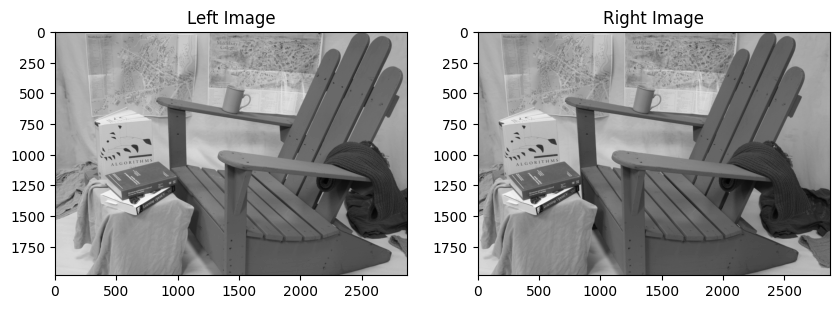

Number of good matches: 10669


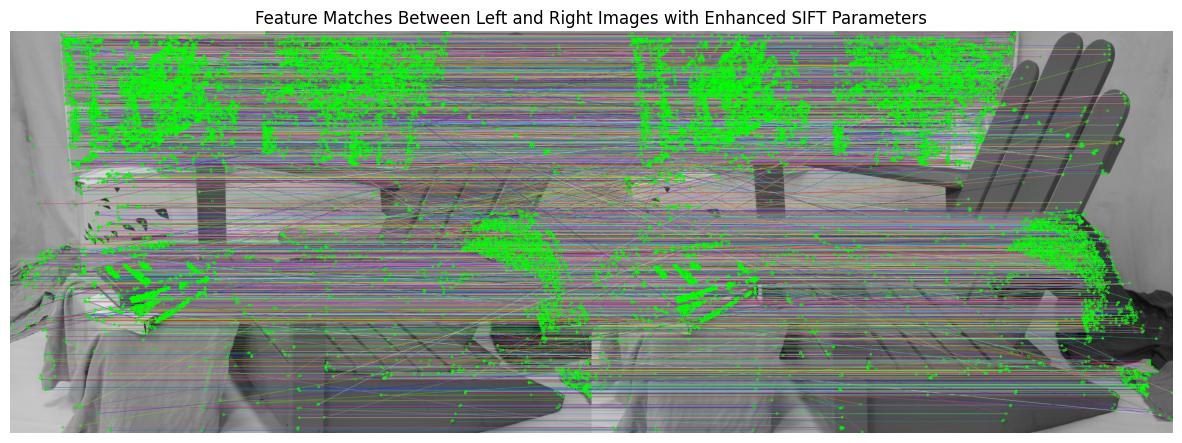

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Given focal length and baseline
focal_length = 4152.073  # in pixels
baseline = 176.252       # in mm or the same unit

# Load left and right images
left_image = cv2.imread('./Images/im0.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('./Images/im1.png', cv2.IMREAD_GRAYSCALE)

if left_image is None or right_image is None:
    raise ValueError("Images not found! Make sure 'im0.png' and 'im1.png' are in the correct directory.")

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(left_image, cmap='gray'), plt.title("Left Image")
plt.subplot(1, 2, 2), plt.imshow(right_image, cmap='gray'), plt.title("Right Image")
plt.show()

def detect_and_match_features(left_image, right_image, ratio_test_threshold=0.85):
    # Adjust SIFT parameters for more keypoints
    sift = cv2.SIFT_create(
        nfeatures=20000,               # Increase the number of features significantly
        nOctaveLayers=5,               # More layers per octave
        contrastThreshold=0.01,        # Lower threshold to capture more keypoints in low-contrast areas
        edgeThreshold=8,               # Slightly reduced to allow more edge features
        sigma=1.4                      # Adjust sigma for larger features
    )
    
    keypoints_left, descriptors_left = sift.detectAndCompute(left_image, None)
    keypoints_right, descriptors_right = sift.detectAndCompute(right_image, None)

    # FLANN-based matcher
    index_params = dict(algorithm=1, trees=10)  # Lower trees to avoid overfitting and increase search flexibility
    search_params = dict(checks=100)  # Increase the number of checks to be more thorough in matching
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # kNN matching
    matches = flann.knnMatch(descriptors_left, descriptors_right, k=2)
    good_matches = [m for m, n in matches if m.distance < ratio_test_threshold * n.distance]

    # Draw matches with larger markers for better visibility
    matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, good_matches, None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    # Optionally, draw larger circles for better visibility
    for match in good_matches:
        pt_left = tuple(map(int, keypoints_left[match.queryIdx].pt))
        pt_right = tuple(map(int, keypoints_right[match.trainIdx].pt))
        
        # Left image point
        cv2.circle(matched_image, pt_left, 5, (0, 255, 0), thickness=2)
        # Right image point (adjust x coordinate to shift to the right image in drawMatches)
        cv2.circle(matched_image, (pt_right[0] + left_image.shape[1], pt_right[1]), 5, (0, 255, 0), thickness=2)

    return good_matches, keypoints_left, keypoints_right, matched_image

# Feature matching with adjusted parameters
good_matches, keypoints_left, keypoints_right, matched_image = detect_and_match_features(left_image, right_image)

print("Number of good matches:", len(good_matches))

# Display matched image with adjusted parameters
plt.figure(figsize=(15, 10))
plt.imshow(matched_image)
plt.title("Feature Matches Between Left and Right Images with Enhanced SIFT Parameters")
plt.axis("off")
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Given focal length and baseline
focal_length = 4152.073  # in pixels
baseline = 176.252       # in mm or the same unit

# Load left and right images
left_image = cv2.imread('./Images/im0.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('./Images/im1.png', cv2.IMREAD_GRAYSCALE)

if left_image is None or right_image is None:
    raise ValueError("Images not found! Make sure 'im0.png' and 'im1.png' are in the correct directory.")

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(left_image, cmap='gray'), plt.title("Left Image")
plt.subplot(1, 2, 2), plt.imshow(right_image, cmap='gray'), plt.title("Right Image")
plt.show()

def detect_and_match_features(left_image, right_image, use_ratio_test=False):
    # Aggressive SIFT parameters for maximum keypoints
    sift = cv2.SIFT_create(
        nfeatures=30000,               # Significantly increase number of features
        nOctaveLayers=5,               # More layers per octave for richer detail
        contrastThreshold=0.01,        # Lower threshold for more keypoints
        edgeThreshold=5,               # Reduced further to detect more edge features
        sigma=1.4                      # Adjust sigma for slightly larger features
    )
    
    keypoints_left, descriptors_left = sift.detectAndCompute(left_image, None)
    keypoints_right, descriptors_right = sift.detectAndCompute(right_image, None)

    # FLANN-based matcher with more flexibility
    index_params = dict(algorithm=1, trees=1)  # Lower trees for flexibility
    search_params = dict(checks=200)           # Higher checks for thorough search
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # kNN matching without ratio test for maximum matches
    matches = flann.knnMatch(descriptors_left, descriptors_right, k=2)
    if use_ratio_test:
        good_matches = [m for m, n in matches if m.distance < 0.85 * n.distance]
    else:
        good_matches = [m[0] for m in matches if m]  # Accept all first matches without ratio test

    # Draw matches with larger markers for better visibility
    matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, good_matches, None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    # Optionally, draw larger circles for better visibility
    for match in good_matches:
        pt_left = tuple(map(int, keypoints_left[match.queryIdx].pt))
        pt_right = tuple(map(int, keypoints_right[match.trainIdx].pt))
        
        # Left image point
        cv2.circle(matched_image, pt_left, 5, (0, 255, 0), thickness=2)
        # Right image point (adjust x coordinate to shift to the right image in drawMatches)
        cv2.circle(matched_image, (pt_right[0] + left_image.shape[1], pt_right[1]), 5, (0, 255, 0), thickness=2)

    return good_matches, keypoints_left, keypoints_right, matched_image

# Feature matching with aggressive parameters and no ratio test
good_matches, keypoints_left, keypoints_right, matched_image = detect_and_match_features(left_image, right_image, use_ratio_test=False)

print("Number of good matches:", len(good_matches))

# Display matched image with enhanced parameters
plt.figure(figsize=(15, 10))
plt.imshow(matched_image)
plt.title("Feature Matches Between Left and Right Images with Aggressive SIFT Parameters")
plt.axis("off")
plt.show()